In [1]:
import os
import sys

from matplotlib import pyplot as plt
import random
import math
try:
  import networkx as nx
  has_networkx = True
except:
  has_networkx = False 

In [2]:
def load_bounding_box_annotations(dataset_path=''):
  
  bboxes = {}
  
  with open(os.path.join(dataset_path, 'bounding_boxes.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      bbox = map(int, pieces[1:])
      bboxes[image_id] = bbox
  
  return bboxes

def load_part_annotations(dataset_path=''):
  
  parts = {}
  
  with open(os.path.join(dataset_path, 'parts/part_locs.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      parts.setdefault(image_id, [0] * 11)
      part_id = int(pieces[1])
      parts[image_id][part_id] = map(int, pieces[2:])

  return parts  
  
def load_part_names(dataset_path=''):
  
  names = {}

  with open(os.path.join(dataset_path, 'parts/parts.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      part_id = int(pieces[0])
      names[part_id] = ' '.join(pieces[1:])
  
  return names  
    
def load_class_names(dataset_path=''):
  
  names = {}
  
  with open(os.path.join(dataset_path, 'classes.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      class_id = pieces[0]
      names[class_id] = ' '.join(pieces[1:])
  
  return names

def load_image_labels(dataset_path=''):
  labels = {}
  
  with open(os.path.join(dataset_path, 'image_class_labels.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      class_id = pieces[1]
      labels[image_id] = class_id
  
  return labels
        
def load_image_paths(dataset_path='', path_prefix=''):
  
  paths = {}
  
  with open(os.path.join(dataset_path, 'images.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      path = os.path.join(path_prefix, pieces[1])
      paths[image_id] = path
  
  return paths

def load_image_sizes(dataset_path=''):
  
  sizes = {}
  
  with open(os.path.join(dataset_path, 'sizes.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      width, height = map(int, pieces[1:])
      sizes[image_id] = [width, height]
  
  return sizes

def load_hierarchy(dataset_path=''):
  
  parents = {}
  
  with open(os.path.join(dataset_path, 'hierarchy.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      child_id, parent_id = pieces
      parents[child_id] = parent_id
  
  return parents

def load_photographers(dataset_path=''):
  
  photographers = {}
  with open(os.path.join(dataset_path, 'photographers.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      photographers[image_id] = ' '.join(pieces[1:])
  
  return photographers

def load_train_test_split(dataset_path=''):
  train_images = []
  test_images = []
  
  with open(os.path.join(dataset_path, 'train_test_split.txt')) as f:
    for line in f:
      pieces = line.strip().split()
      image_id = pieces[0]
      is_train = int(pieces[1])
      if is_train:
        train_images.append(image_id)
      else:
        test_images.append(image_id)
        
  return train_images, test_images

In [3]:
dataset_path = '../data_nabirds'
image_path  = 'images'

In [4]:
# Load in the image data
# Assumes that the images have been extracted into a directory called "images"
image_paths = load_image_paths(dataset_path, path_prefix=image_path)
image_sizes = load_image_sizes(dataset_path)
image_bboxes = load_bounding_box_annotations(dataset_path)
image_parts = load_part_annotations(dataset_path)
image_class_labels = load_image_labels(dataset_path)

# Load in the class data
class_names = load_class_names(dataset_path)
class_hierarchy = load_hierarchy(dataset_path)

In [5]:
# Load in the part data
part_names = load_part_names(dataset_path)
part_ids = list(part_names.keys())
part_ids.sort()

ValueError: not enough values to unpack (expected 3, got 0)

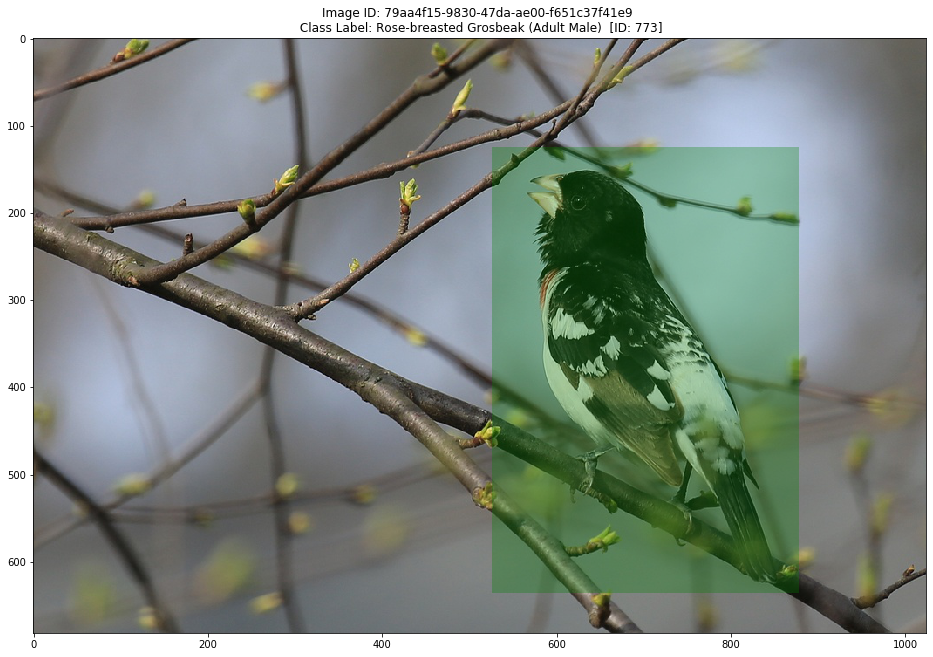

In [6]:
# Load in the photographers
photographers = load_photographers(dataset_path)

# Load in the train / test split
train_images, test_images = load_train_test_split(dataset_path)

# Visualize the images and their annotations
image_identifiers = list(image_paths.keys())
random.shuffle(image_identifiers) 

for image_id in image_identifiers[0:2]:
    image_path = image_paths[image_id]
    image = plt.imread(os.path.join(dataset_path,image_path))
    bbox = image_bboxes[image_id]
    parts = image_parts[image_id]
    class_label = image_class_labels[image_id]
    class_name = class_names[class_label]
    
    # Render the image
    plt.close(1)
    fig = plt.figure(1, figsize=(16, 12))
    plt.imshow(image)
    plt.title("Image ID: %s \n Class Label: %s  [ID: %s]" % (image_id, class_name, class_label))

    # Render the bounding box annotations
    bbox_x, bbox_y, bbox_width, bbox_height = bbox
    currentAxis = plt.gca()
    currentAxis.add_patch(plt.Rectangle((bbox_x , bbox_y), bbox_width, bbox_height, facecolor="green", alpha=0.3))
    
    # Render the part annotations
    if has_networkx:
      # Use networkx spring layout

        G = nx.Graph()
        part_data = []
        initial_positions = {}
        for part_id, part in enumerate(parts):
            x, y, v = part
            if v: 

                part_str = 'part_%d' % (part_id,)
                label_str = 'label_%d' % (part_id,)

                G.add_node(part_str)
                G.add_node(label_str)
                G.add_edge(part_str, label_str)

                part_data.append(part_str)

                initial_positions[part_str] = (x, y)
                initial_positions[label_str] = (x, y)

        positions = nx.spring_layout(G, dim=2, k=20.0, pos=initial_positions, fixed=part_data)
        
        for part_id, part in enumerate(parts):
            x, y, v = part
            if v: 

                plt.plot(x, y, 'o')

                label_str = 'label_%d' % (part_id,)
                label_position = positions[label_str]
                label_xy = (label_position[0] * bbox_width + bbox_x, label_position[1] * bbox_height + bbox_y)
                plt.annotate(
                    part_names[part_id], 
                    xy=(x, y),
                    xycoords='data', 
                    xytext= label_xy, 
                    textcoords='data',
                    ha='right', 
                    va='bottom',
                    bbox=dict(boxstyle= 'round,pad=0.5', 
                          fc='yellow', 
                          alpha=0.5),
                    arrowprops=dict(arrowstyle='->', 
                            connectionstyle='arc3,rad=0')
                )
                
    else:
        # just a basic label annotation for the part locations
        offset = (2 * math.pi) / len(parts)
        for part_id, part in enumerate(parts):
            x, y, v = part
            if v: 
                # try to offset the part labels so that they don't overlap too badly
                dist = random.randint(35, 65)
                offset_x = dist * math.cos(offset * part_id)
                offset_y = dist * math.sin(offset * part_id)

                plt.plot(x, y, 'o')
                plt.annotate(
                    part_names[part_id], 
                    xy=(x, y), 
                    xytext=(offset_x, offset_y), 
                    textcoords='offset points', 
                    ha='right', 
                    va='bottom',
                    bbox=dict(boxstyle= 'round,pad=0.5', 
                          fc='yellow', 
                          alpha=0.5),
                    arrowprops=dict(arrowstyle='->', 
                            connectionstyle='arc3,rad=0')
                )
                
    plt.show(block=False)

    # Print some info about the image and the annotations:
    print("Image ID: {}".format(image_id))
    print("Image Path: {}".format(image_path,))
    print("Image Dimensions: {} x {}".format(image_sizes[image_id][0], image_sizes[image_id][1]))
    print("Photographer: {}".format(photographers[image_id],))
    print("Split: {}".format("train" if image_id in train_images else "test"))
    print("Class Label Path:")

    label_path = []
    current_class_label = class_label
    while current_class_label in class_hierarchy:
        label_path.append((class_names[current_class_label], current_class_label))
        current_class_label = class_hierarchy[current_class_label]
    label_path.append((class_names[current_class_label], current_class_label)) # add the root node
    label_path.reverse()
    for depth, (class_name, class_id) in enumerate(label_path):
        line = "\t" * (depth + 1)
        print(line + "|- {} \t[ID: {}]".format(class_name, class_id))

    print("Bounding Box Dimensions: {} x {}".format(bbox_width, bbox_height))
    print("{}\t{}".format('Part Name', 'Visibility'))
    for part_id in part_ids:
        x, y, v = parts[part_id]
        print("{}\t{}".format(part_names[part_id], 'Y' if v else 'N'))

    # Keep showing images until a button other than Enter is pressed
    ri = raw_input("Press Enter to continue. Or press any key and then enter to quit...")
    if ri != '':
        break
    print
    print

In [ ]:
# Render the part annotations
if has_networkx:
  # Use networkx spring layout

    G = nx.Graph()
    part_data = []
    initial_positions = {}
    for part_id, part in enumerate(parts):
        x, y, v = part
        if v: 

            part_str = 'part_%d' % (part_id,)
            label_str = 'label_%d' % (part_id,)

            G.add_node(part_str)
            G.add_node(label_str)
            G.add_edge(part_str, label_str)

            part_data.append(part_str)

            initial_positions[part_str] = (x, y)
            initial_positions[label_str] = (x, y)

    positions = nx.spring_layout(G, dim=2, k=20.0, pos=initial_positions, fixed=part_data)

    for part_id, part in enumerate(parts):
        x, y, v = part
        if v: 

            plt.plot(x, y, 'o')

            label_str = 'label_%d' % (part_id,)
            label_position = positions[label_str]
            label_xy = (label_position[0] * bbox_width + bbox_x, label_position[1] * bbox_height + bbox_y)
            plt.annotate(
                part_names[part_id], 
                xy=(x, y),
                xycoords='data', 
                xytext= label_xy, 
                textcoords='data',
                ha='right', 
                va='bottom',
                bbox=dict(boxstyle= 'round,pad=0.5', 
                      fc='yellow', 
                      alpha=0.5),
                arrowprops=dict(arrowstyle='->', 
                        connectionstyle='arc3,rad=0')
            )

else:
    # just a basic label annotation for the part locations
    offset = (2 * math.pi) / len(parts)
    for part_id, part in enumerate(parts):
        x, y, v = part
        if v: 
            # try to offset the part labels so that they don't overlap too badly
            dist = random.randint(35, 65)
            offset_x = dist * math.cos(offset * part_id)
            offset_y = dist * math.sin(offset * part_id)

            plt.plot(x, y, 'o')
            plt.annotate(
                part_names[part_id], 
                xy=(x, y), 
                xytext=(offset_x, offset_y), 
                textcoords='offset points', 
                ha='right', 
                va='bottom',
                bbox=dict(boxstyle= 'round,pad=0.5', 
                      fc='yellow', 
                      alpha=0.5),
                arrowprops=dict(arrowstyle='->', 
                        connectionstyle='arc3,rad=0')
            )

plt.show(block=False)

# Print some info about the image and the annotations:
print("Image ID: {}".format(image_id))
print("Image Path: {}".format(image_path,))
print("Image Dimensions: {} x {}".format(image_sizes[image_id][0], image_sizes[image_id][1]))
print("Photographer: {}".format(photographers[image_id],))
print("Split: {}".format("train" if image_id in train_images else "test"))
print("Class Label Path:")

label_path = []
current_class_label = class_label
while current_class_label in class_hierarchy:
    label_path.append((class_names[current_class_label], current_class_label))
    current_class_label = class_hierarchy[current_class_label]
label_path.append((class_names[current_class_label], current_class_label)) # add the root node
label_path.reverse()
for depth, (class_name, class_id) in enumerate(label_path):
    line = "\t" * (depth + 1)
    print(line + "|- {} \t[ID: {}]".format(class_name, class_id))

print("Bounding Box Dimensions: {} x {}".format(bbox_width, bbox_height))
print("{}\t{}".format('Part Name', 'Visibility'))
for part_id in part_ids:
    x, y, v = parts[part_id]
    print("{}\t{}".format(part_names[part_id], 'Y' if v else 'N'))

# Keep showing images until a button other than Enter is pressed
ri = raw_input("Press Enter to continue. Or press any key and then enter to quit...")
if ri != '':
    break
print
print